<a href="https://colab.research.google.com/github/ravindrabajpai/sp_forecasting/blob/main/sbins_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [56]:
!pip install plotly
!pip install pmdarima
!pip install yfinance


In [57]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import datetime as dt
from datetime import timedelta
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.metrics import mean_squared_error,r2_score, mean_absolute_error,mean_squared_log_error
import statsmodels.api as sm
from statsmodels.tsa.api import Holt,SimpleExpSmoothing,ExponentialSmoothing
from pmdarima import auto_arima

In [58]:
import pandas as pd
import yfinance as yf
import datetime
import time
import requests
import io

In [59]:
stock = 'SBIN.NS'
start = int(time.mktime(datetime.datetime(2017,4,22, 23,59).timetuple()))
end = int(time.mktime(datetime.datetime(2022,4,22, 23,59).timetuple()))
interval= '1d'
url=f"https://query1.finance.yahoo.com/v7/finance/download/{stock}?period1={start}&period2={end}&interval={interval}&events=history&includeAdjustedClose=true"


In [60]:
df = pd.read_csv(url)

In [61]:
df.head()
df['Date'] =  pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']
df = df.drop('Date',axis=1)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-04-24,283.250000,287.850006,280.899994,286.049988,280.892944,10077853
2017-04-25,287.500000,288.799988,285.000000,286.049988,280.892944,11531902
2017-04-26,287.100006,289.500000,283.350006,286.450012,281.285736,13836891
2017-04-27,286.450012,287.950012,281.049988,282.049988,276.965057,22622372
2017-04-28,283.000000,290.750000,282.500000,289.750000,284.526215,14152004


In [62]:
import plotly.express as px
fig = px.line(y=df.Close, x=df.index)
fig.update_layout(title_text='Prices of SBI',font=dict(size=12),
                 xaxis_title_text="Date", yaxis_title_text="Adj Close")
fig.show()

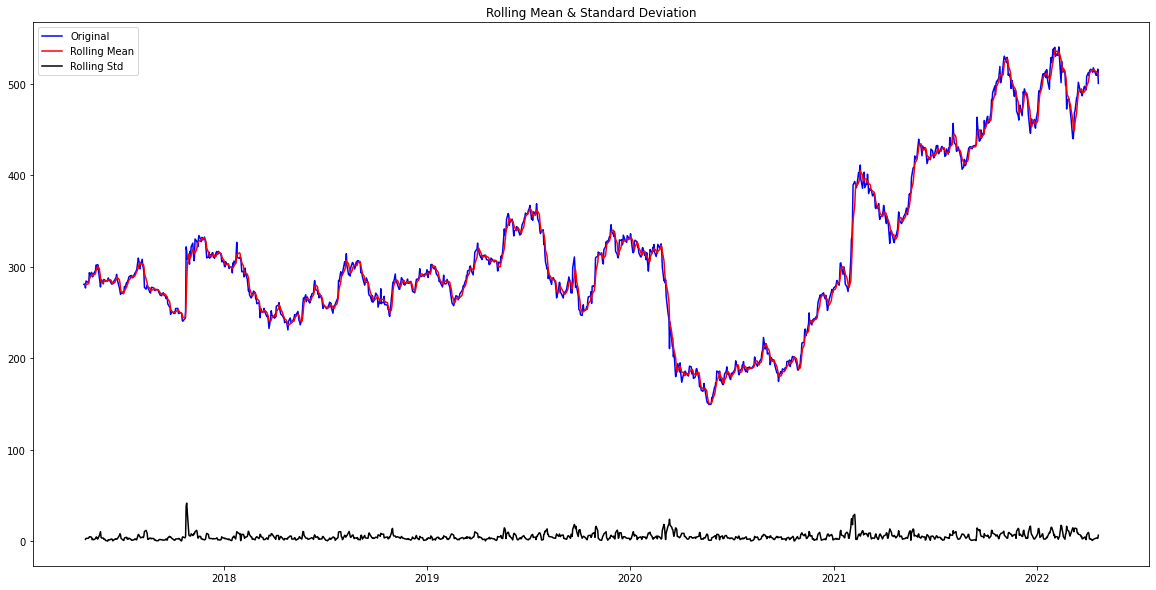

Results of Dickey-Fuller Test:
Test Statistic                  -0.906841
p-value                          0.785711
#Lags Used                       5.000000
Number of Observations Used   1230.000000
Critical Value (1%)             -3.435678
dtype: float64
result : data is not stationary
Test Statistic                  -0.906841
p-value                          0.785711
#Lags Used                       5.000000
Number of Observations Used   1230.000000
Critical Value (1%)             -3.435678
Critical Value (5%)             -2.863893
dtype: float64
result : data is not stationary
Test Statistic                  -0.906841
p-value                          0.785711
#Lags Used                       5.000000
Number of Observations Used   1230.000000
Critical Value (1%)             -3.435678
Critical Value (5%)             -2.863893
Critical Value (10%)            -2.568023
dtype: float64
result : data is not stationary


In [63]:
# Run the Dicky Fuller Test to Check Stasionarity
from statsmodels.tsa.stattools import adfuller 

def is_stationary(timeseries):
    #Determining rolling statistics
    rollmean = timeseries.rolling(4).mean() # around 4 weeks on each month
    rollstd = timeseries.rolling(4).std()
    
    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rollmean, color='red', label='Rolling Mean')
    std = plt.plot(rollstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
      dfoutput['Critical Value (%s)'%key] = value
      print (dfoutput)
      
      if dfoutput['p-value'] < 0.05:
          print('result : data is stationary')
      else : print('result : data is not stationary')


from matplotlib.pylab import rcParams 
rcParams['figure.figsize'] = 20,10
is_stationary(df['Adj Close'])



In [64]:
# the time series is non-stationary. 
# Hence, We need to make the data stationary by using the “Integrated (I)” concept, denoted by value ‘d’ in time series
# in the Auto ARIMA model

model_train=df.iloc[:int(df.shape[0]*0.80)]
valid=df.iloc[int(df.shape[0]*0.80):]
y_pred=valid.copy()



In [65]:
model_arima= auto_arima(model_train["Adj Close"],trace=True, error_action='ignore', start_p=1,start_q=1,max_p=3,max_q=3,
              suppress_warnings=True,stepwise=False,seasonal=False)
model_arima.fit(model_train["Adj Close"])

 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=6569.006, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=6570.861, Time=0.19 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=6572.504, Time=0.28 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=6573.811, Time=0.53 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=6570.856, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=6570.582, Time=0.84 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=6574.318, Time=1.07 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=6575.777, Time=2.08 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=6572.513, Time=0.38 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=6574.389, Time=1.72 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.42 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=6570.098, Time=4.19 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=6574.133, Time=0.49 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=6576.113, Time=1.57 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=6570.051, Time=3.23 sec

Best model:  A

ARIMA(order=(0, 1, 0), scoring_args={}, suppress_warnings=True)

In [66]:
prediction=model_arima.predict(len(valid))
y_pred["ARIMA Model Prediction"]=prediction
r2= r2_score(y_pred["Close"],y_pred["ARIMA Model Prediction"])
mse= mean_squared_error(y_pred["Close"],y_pred["ARIMA Model Prediction"])
rmse=np.sqrt(mean_squared_error(y_pred["Close"],y_pred["ARIMA Model Prediction"]))
mae=mean_absolute_error(y_pred["Close"],y_pred["ARIMA Model Prediction"])
rmsle = np.sqrt(mean_squared_log_error(y_pred["Close"],y_pred["ARIMA Model Prediction"]))
print("R Square : ",r2)
print("Mean Square Error : ",mse)
print("Root Mean Square Error : ",rmse)
print("Mean Absoulute Error : ",mae)
print("Root Mean Squared Logarithmic Error : ", rmsle)

R Square :  -6.857754764124141
Mean Square Error :  16408.950739937154
Root Mean Square Error :  128.0974267498655
Mean Absoulute Error :  120.8123531734511
Root Mean Squared Logarithmic Error :  0.31234977241035017


In [67]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=model_train.index, y=model_train["Adj Close"], mode='lines',name="Train Data", marker=dict(color='red',size=15)))
fig.add_trace(go.Scatter(x=valid.index, y=valid["Adj Close"], mode='lines',name="Validation Data", marker=dict(color='blue',size=15)))
fig.add_trace(go.Scatter(x=valid.index, y=y_pred["Adj Close"], mode='lines',name="Prediction", marker=dict(color='green',size=15)))
fig.update_layout(title="ARIMA",xaxis_title="Date",yaxis_title="Adj Close",legend=dict(x=0,y=1,traceorder="normal"),font=dict(size=12))
fig.show()

In [68]:
new_dates=[]
new_predictions=[]
for i in range(1,15):
    new_dates.append(df.index[-1]+timedelta(days=i))
    new_predictions.append(model_arima.predict(len(valid)+i)[-1])
    
pd.set_option('display.float_format', lambda x: '%.6f' % x)
model_predictions=pd.DataFrame(zip(new_dates, new_predictions), columns=["Dates","SBI Price Prediction"])
model_predictions

,Dates,SBI Price Prediction
0,2022-04-23,346.611600
1,2022-04-24,346.664770
2,2022-04-25,346.717941
3,2022-04-26,346.771111
4,2022-04-27,346.824282
5,2022-04-28,346.877452
6,2022-04-29,346.930623
7,2022-04-30,346.983793
8,2022-05-01,347.036963
9,2022-05-02,347.090134
